<a href="https://colab.research.google.com/github/santoshkimandi/Dissertation_RMSE_CURVE/blob/main/Predicting_Diabetes_using_Machine_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the github Repository

In [1]:
!git clone https://github.com/santoshkimandi/Dissertation-Dataset

Cloning into 'Dissertation-Dataset'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 685.83 KiB | 3.13 MiB/s, done.


Loading the data

In [2]:
# Read csv file using pandas
import pandas as pd
filename ="Dissertation-Dataset/diabetes_prediction_dataset.csv"
df = pd.read_csv(filename)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Exploratory Data Analysis

In [3]:
# quick look into data
print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [4]:
print(df.shape)

(100000, 9)


In [5]:
print(df.describe())

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [6]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [7]:
# checking missing values in variables
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

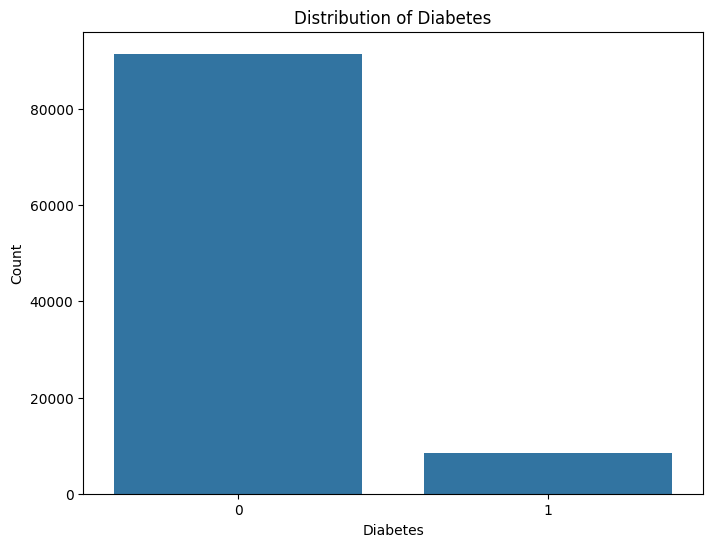

In [8]:
# Distribution of Target Variable (Diabetes)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=df)
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

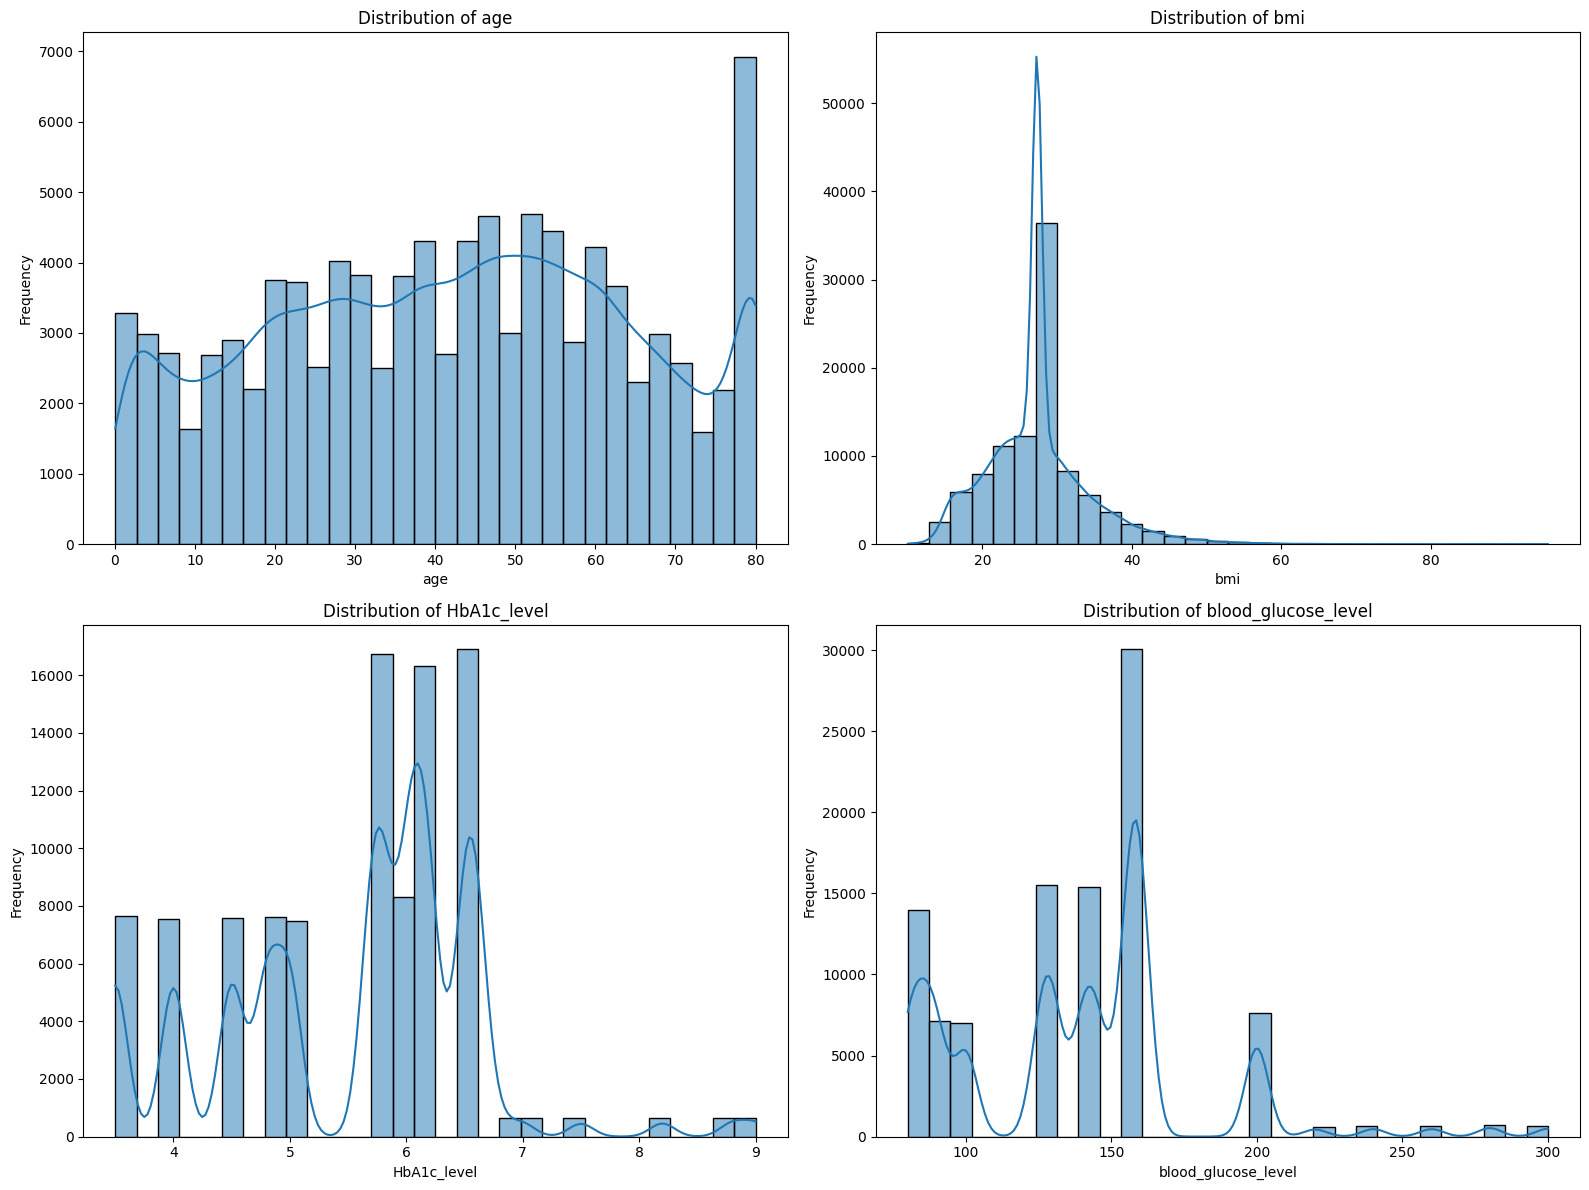

In [9]:
# Distribution of Numerical Features
plt.figure(figsize=(16, 12))

numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

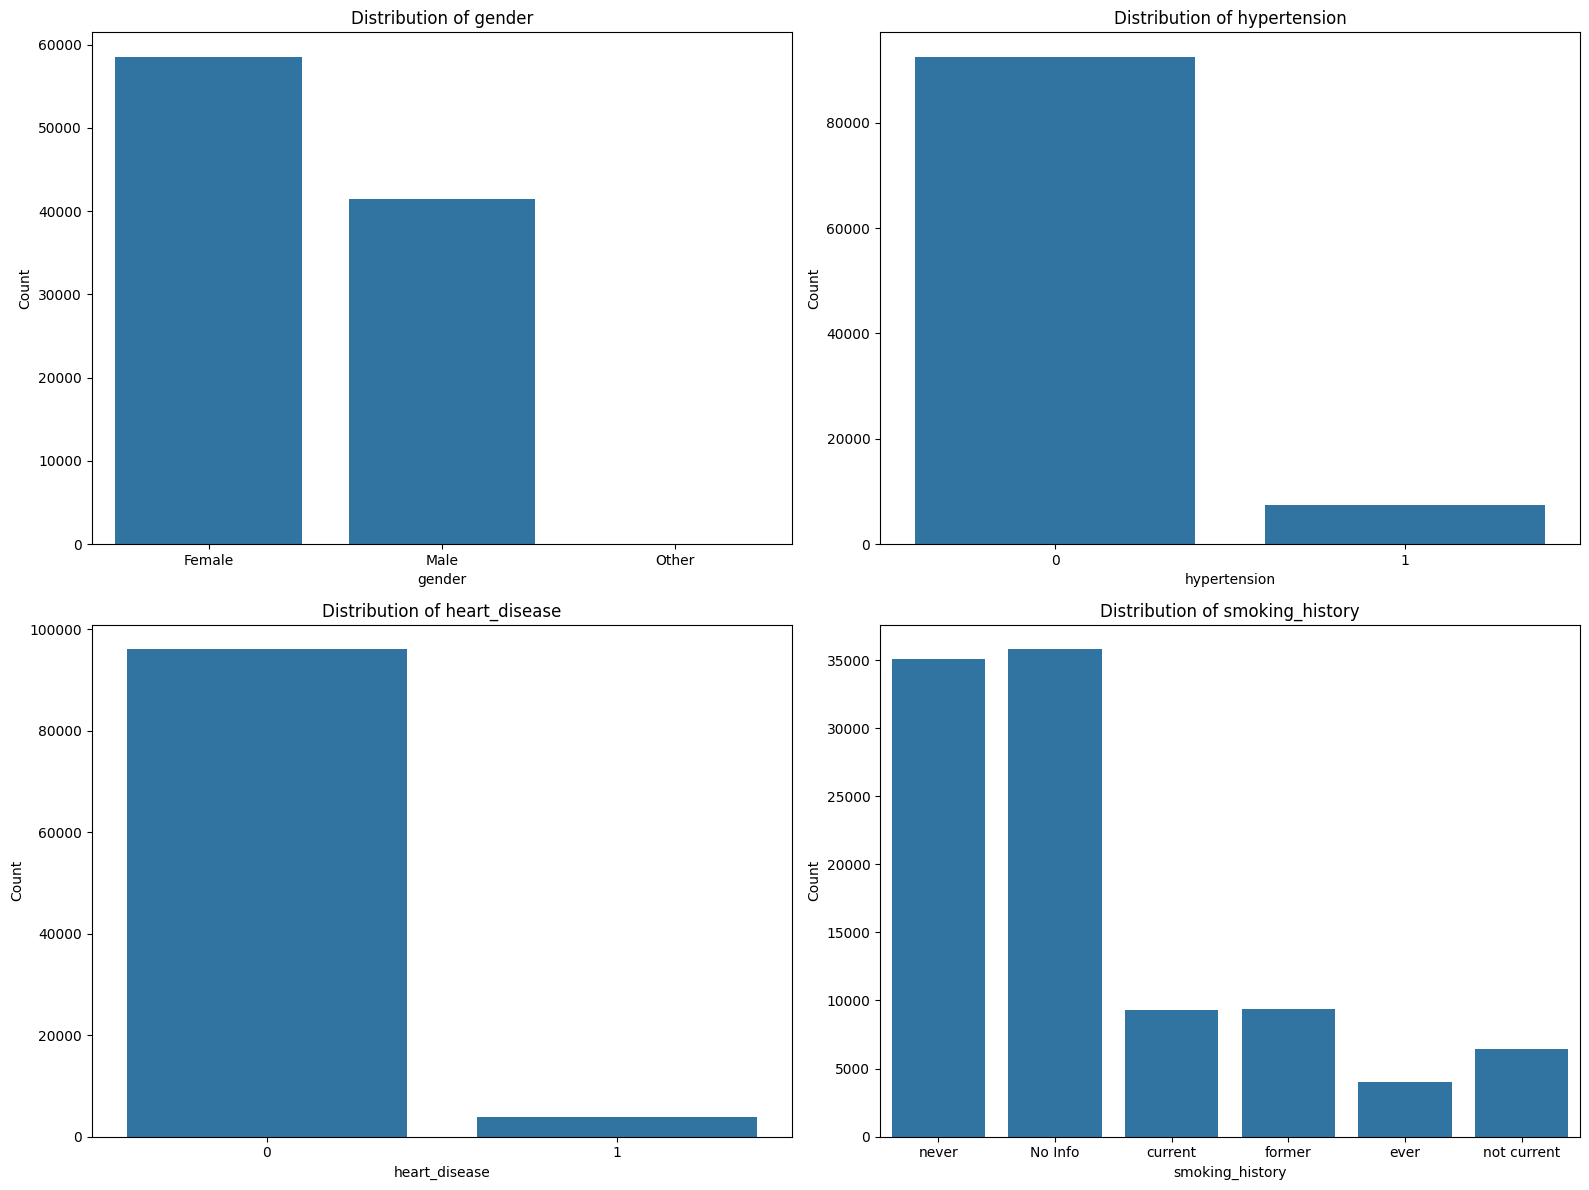

In [10]:
# Analyze Categorical Features
plt.figure(figsize=(16, 12))

categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

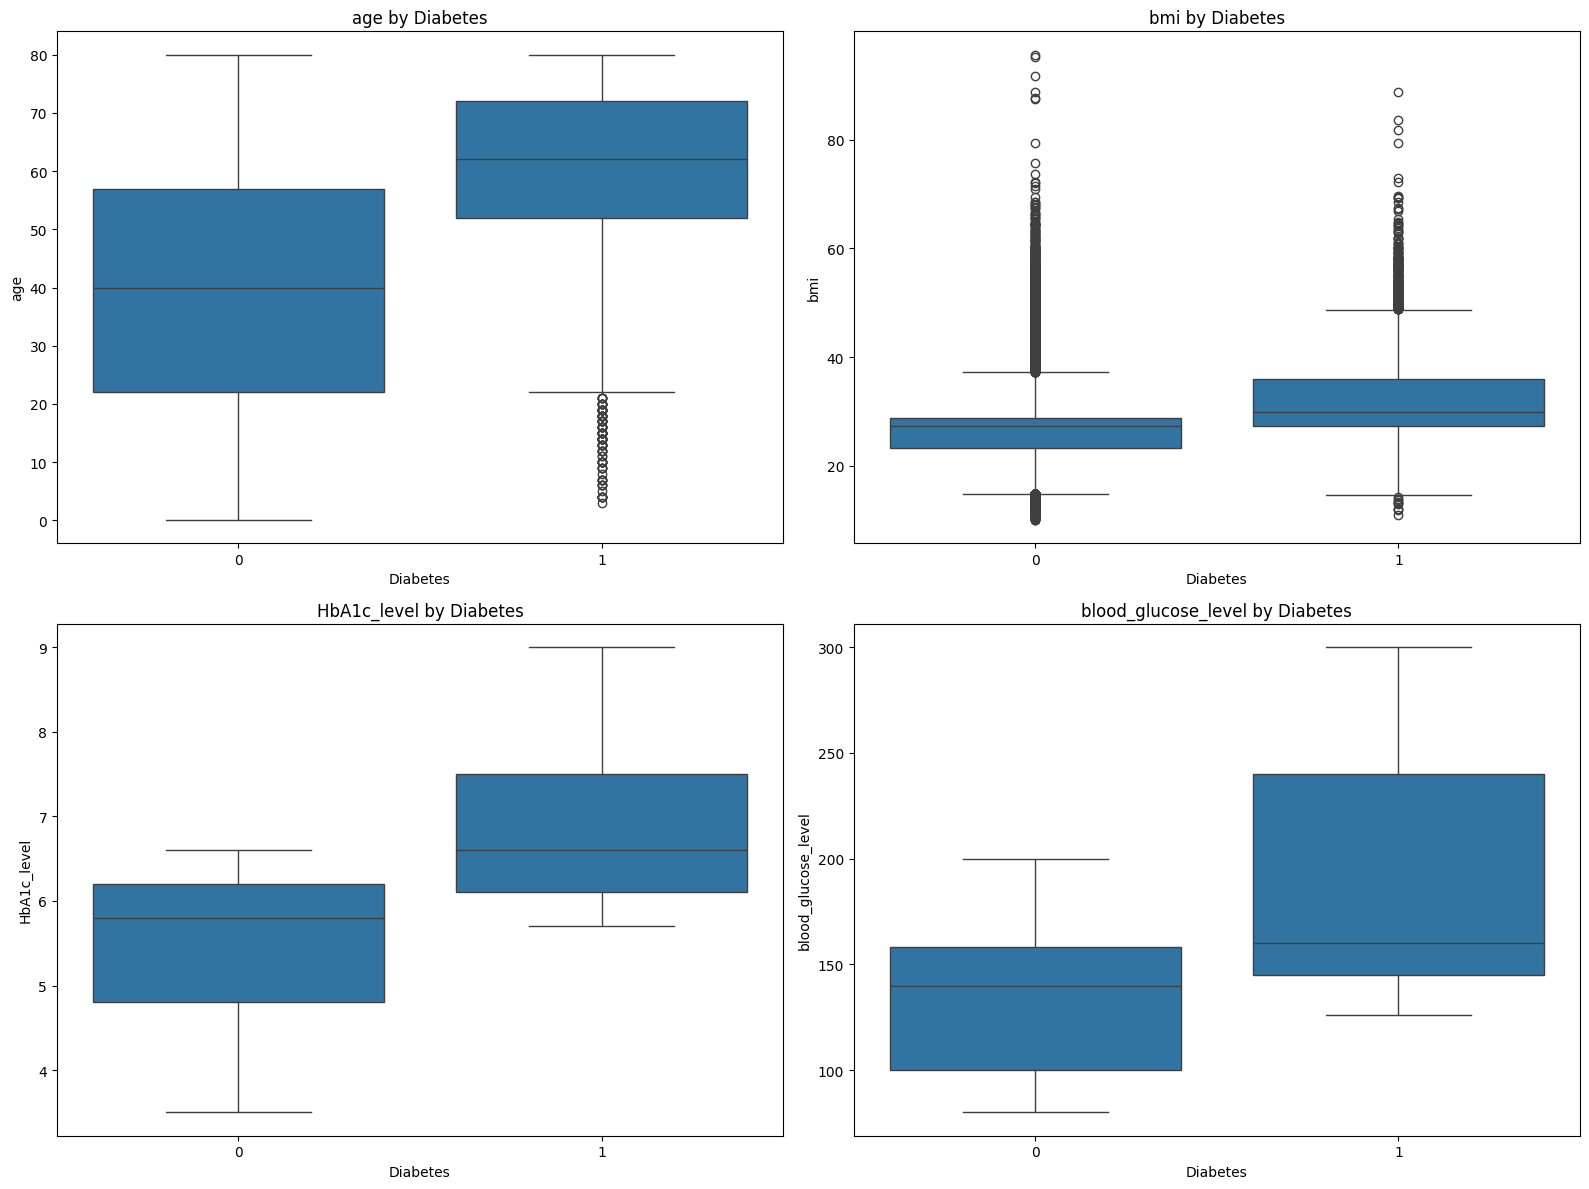

In [11]:
# Relationships Between Features and Target Variable
# Numerical Features vs Diabetes
plt.figure(figsize=(16, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diabetes', y=feature, data=df)
    plt.title(f'{feature} by Diabetes')
    plt.xlabel('Diabetes')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

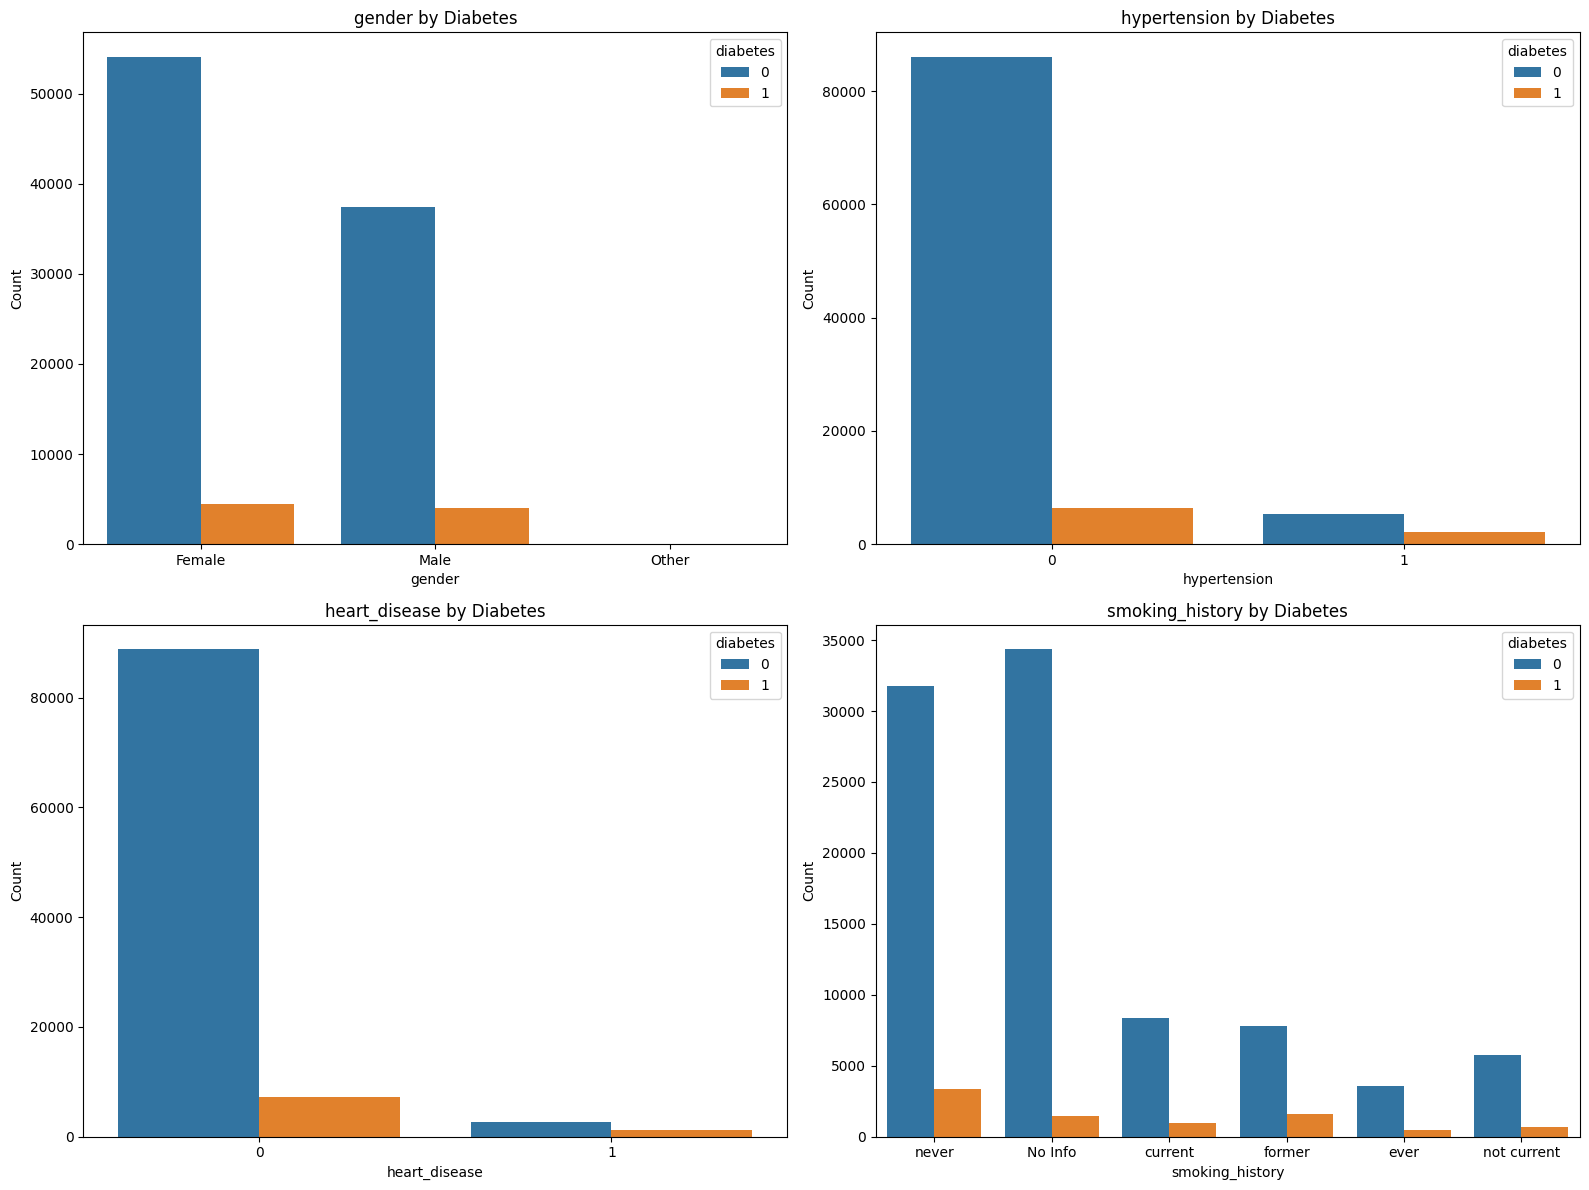

In [12]:
# Categorical Features vs Diabetes
plt.figure(figsize=(16, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='diabetes', data=df)
    plt.title(f'{feature} by Diabetes')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [13]:
# Imputation with Mode
# Ensure 'No Info' values are consistent
df['smoking_history'] = df['smoking_history'].str.strip()

# Recalculate mode in case it has changed
mode_smoking_history = df[df['smoking_history'] != 'No Info']['smoking_history'].mode()[0]

# Replace 'No Info' values
df['smoking_history'] = df['smoking_history'].replace('No Info', mode_smoking_history)

# Verify the replacement
print(df['smoking_history'].value_counts())
print(df['smoking_history'].unique())

smoking_history
never          70911
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64
['never' 'current' 'former' 'ever' 'not current']


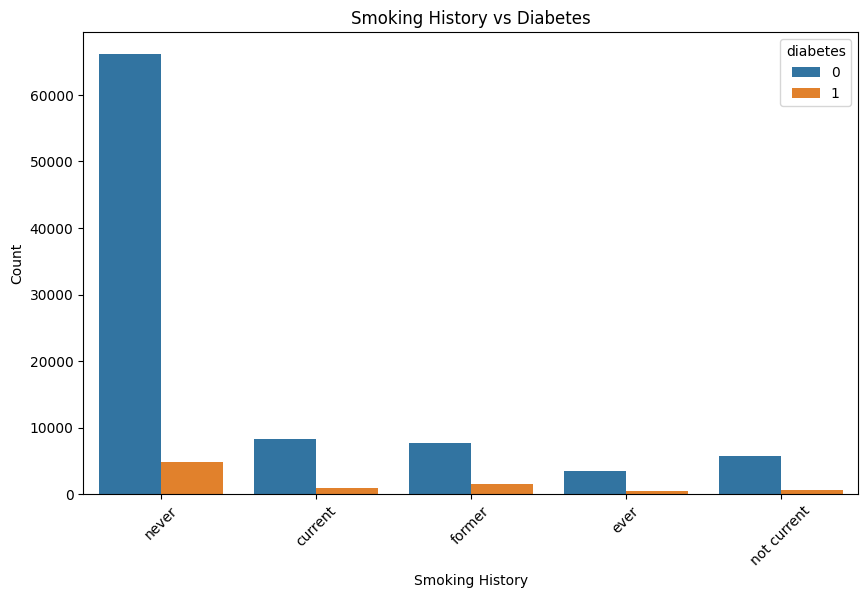

In [14]:
# Plot smoking history vs diabetes
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_history', hue='diabetes', data=df)
plt.title('Smoking History vs Diabetes')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Feature Engineering
# Create a new feature: Age Group
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 80], labels=['0-18', '19-35', '36-50', '51-65', '66-80'])

# Handle outliers in BMI by capping the values at the 1st and 99th percentiles
Q1 = df['bmi'].quantile(0.01)
Q99 = df['bmi'].quantile(0.99)
df['bmi'] = df['bmi'].clip(Q1, Q99)

# Interaction feature between age and bmi
df['age_bmi_interaction'] = df['age'] * df['bmi']


In [16]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,age_bmi_interaction
0,Female,80.0,0,1,never,25.19,6.6,140,0,66-80,2015.20
1,Female,54.0,0,0,never,27.32,6.6,80,0,51-65,1475.28
2,Male,28.0,0,0,never,27.32,5.7,158,0,19-35,764.96
3,Female,36.0,0,0,current,23.45,5.0,155,0,36-50,844.20
4,Male,76.0,1,1,current,20.14,4.8,155,0,66-80,1530.64


In [17]:
# Define features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [18]:
# List of numerical and categorical features
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'age_bmi_interaction']
categorical_features = ['gender', 'smoking_history', 'hypertension', 'heart_disease', 'age_group']

In [19]:
# Preprocessing for numerical data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [20]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Extract the new feature names for the one-hot encoded features
cat_features = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
all_features = numerical_features + list(cat_features)

# Create a DataFrame with the preprocessed data
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_features)

In [21]:
X_preprocessed_df.head()

,age,bmi,HbA1c_level,blood_glucose_level,age_bmi_interaction,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,...,smoking_history_not current,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,age_group_0-18,age_group_19-35,age_group_36-50,age_group_51-65,age_group_66-80
0,1.692704,-0.326659,1.001706,0.047704,1.163369,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.538006,0.006741,1.001706,-1.426210,0.399907,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.616691,0.006741,0.161108,0.489878,-0.604506,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.261399,-0.599013,-0.492690,0.416183,-0.492458,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.515058,-1.117113,-0.679490,0.416183,0.478187,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


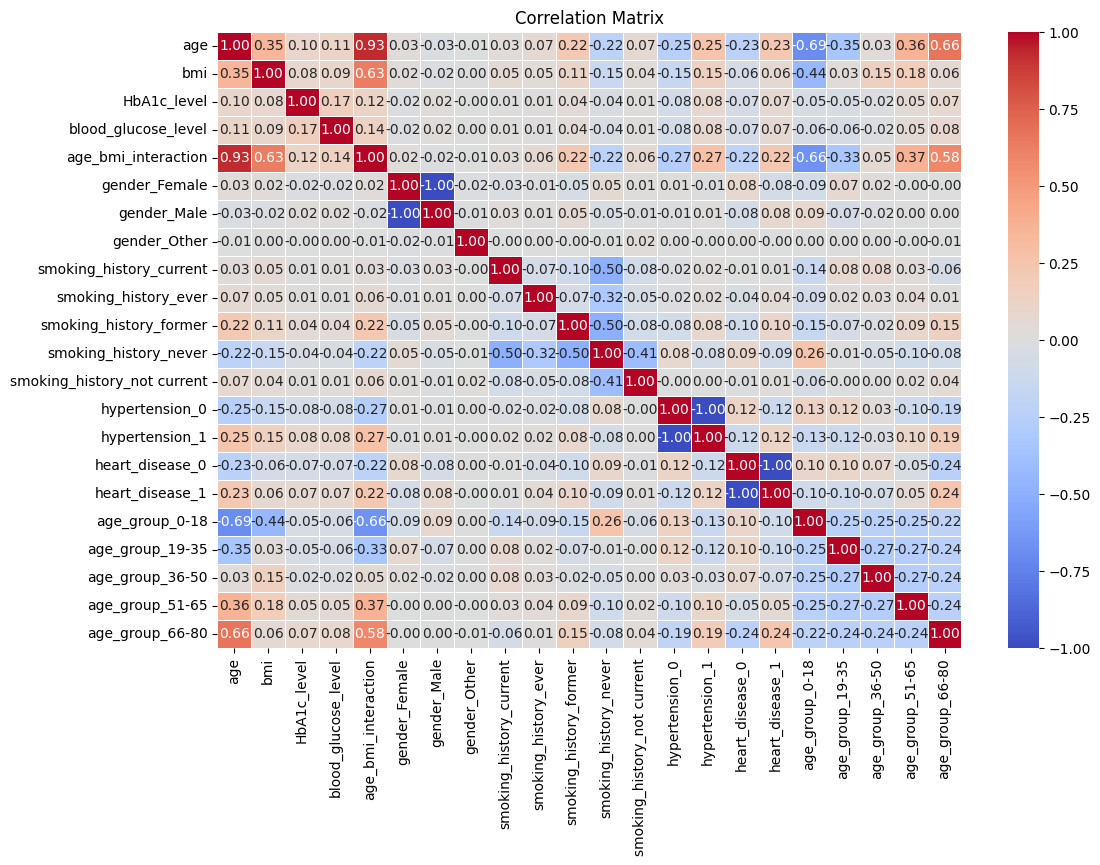

In [22]:
# Compute correlation matrix
correlation_matrix = X_preprocessed_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Balance the dataset

diabetes
0    8500
1    8500
Name: count, dtype: int64


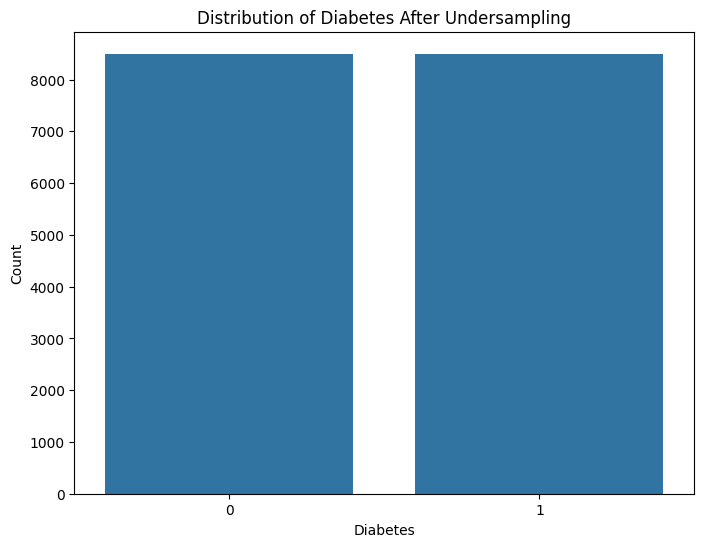

In [23]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.diabetes == 0]
df_minority = df[df.diabetes == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),  # to match minority class
                                   random_state=123)  # reproducible results

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(df_balanced.diabetes.value_counts())

# Define features and target for the balanced dataset
X_balanced = df_balanced.drop('diabetes', axis=1)
y_balanced = df_balanced['diabetes']

# Apply preprocessing to the balanced data
X_balanced_preprocessed = preprocessor.fit_transform(X_balanced)

# Extract the new feature names for the one-hot encoded features
cat_features = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
all_features = numerical_features + list(cat_features)

# Convert the balanced data into a DataFrame for better readability
X_balanced_df = pd.DataFrame(X_balanced_preprocessed, columns=all_features)

# Plot the distribution of the target variable after undersampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_balanced)
plt.title('Distribution of Diabetes After Undersampling')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_balanced_preprocessed, y_balanced, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13600, 22)
X_test shape: (3400, 22)
y_train shape: (13600,)
y_test shape: (3400,)


**Classification Algorithms:**

Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error
import numpy as np

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model with increased max_iter and a different solver (if needed)
logistic_regression_model = LogisticRegression(max_iter=1000, solver='lbfgs')  # 'lbfgs' is the default solver

# Initialize the model
logistic_regression_model = LogisticRegression()

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
lg_report = classification_report(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("Logistic Regression Model")
print("Accuracy:", accuracy)
print("Classification Report:\n", lg_report)
print("RMSE:", rmse)

Logistic Regression Model
Accuracy: 0.8902941176470588
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1687
           1       0.90      0.88      0.89      1713

    accuracy                           0.89      3400
   macro avg       0.89      0.89      0.89      3400
weighted avg       0.89      0.89      0.89      3400

RMSE: 0.3312187832127598


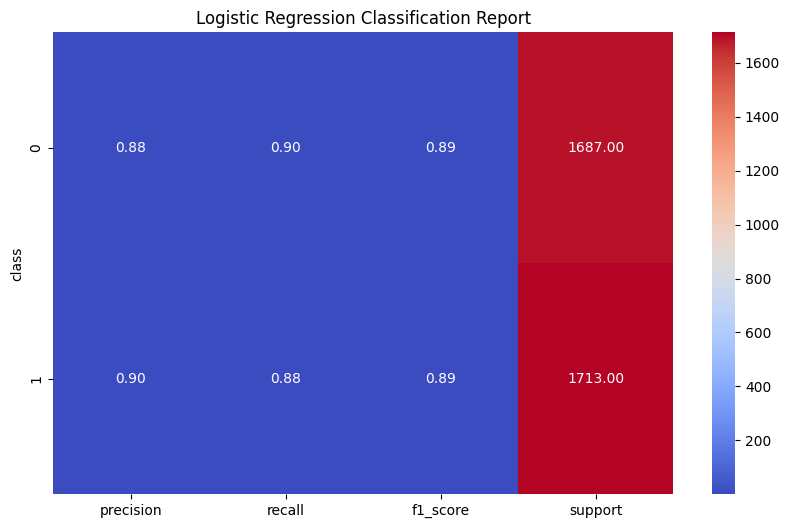

In [26]:
# Function to plot the classification report as a heatmap
def plot_classification_report(report, title):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row_data = line.split()
        if len(row_data) == 0 or len(row_data) < 5:  # skip empty lines or malformed lines
            continue
        row = {}
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = int(row_data[4])
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.set_index('class', inplace=True)
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataframe, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

# Plotting the classification report
plot_classification_report(lg_report, 'Logistic Regression Classification Report')

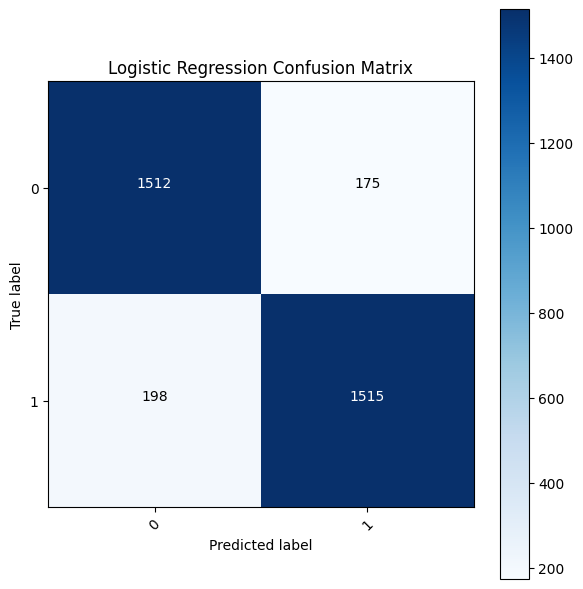

In [27]:
import itertools
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0, 1], title='Logistic Regression Confusion Matrix')


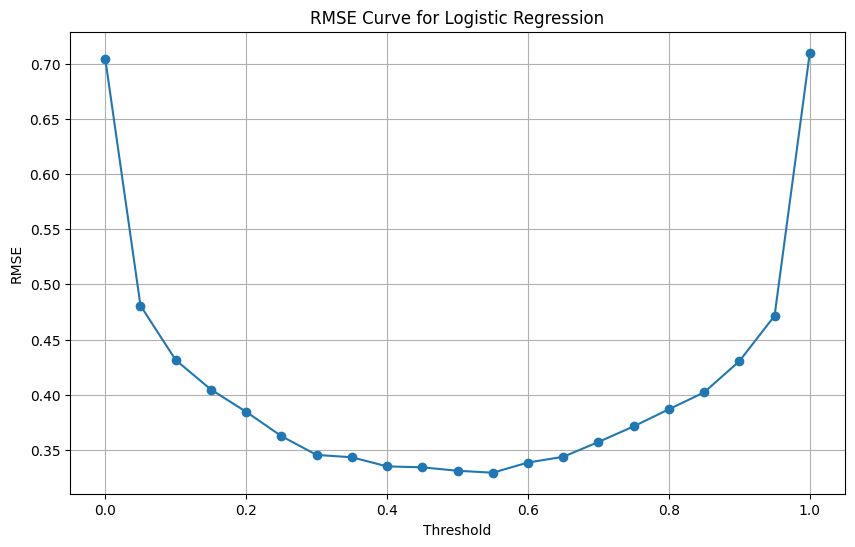

In [28]:
from sklearn.metrics import mean_squared_error

# Predict probabilities
y_prob = logistic_regression_model.predict_proba(X_test)[:, 1]

# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
rmse_values = []

# Calculate RMSE for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_threshold))
    rmse_values.append(rmse)

# Plot RMSE curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rmse_values, marker='o')
plt.title('RMSE Curve for Logistic Regression')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
decision_tree_model = DecisionTreeClassifier()

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
dtree_report = classification_report(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("Decision Tree Model")
print("Accuracy:", accuracy)
print("Classification Report:\n", dtree_report)
print("RMSE:", rmse)

Decision Tree Model
Accuracy: 0.8758823529411764
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      1687
           1       0.88      0.88      0.88      1713

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400

RMSE: 0.3523033452279775


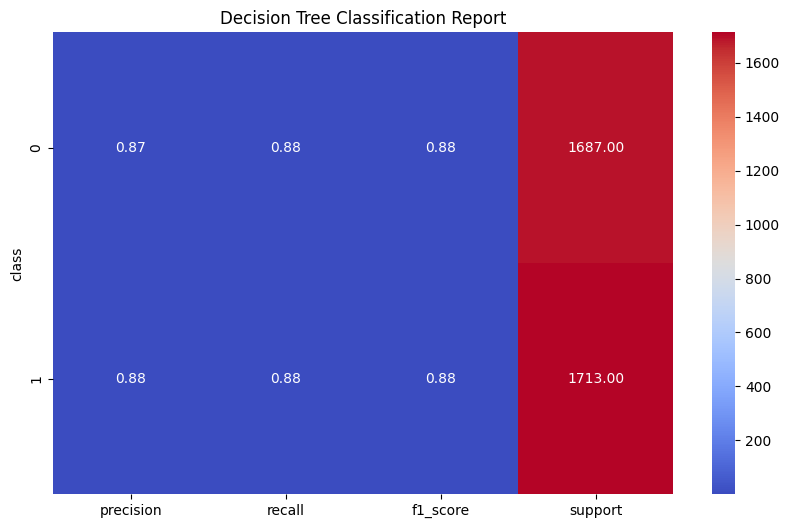

In [30]:
plot_classification_report(dtree_report, 'Decision Tree Classification Report')

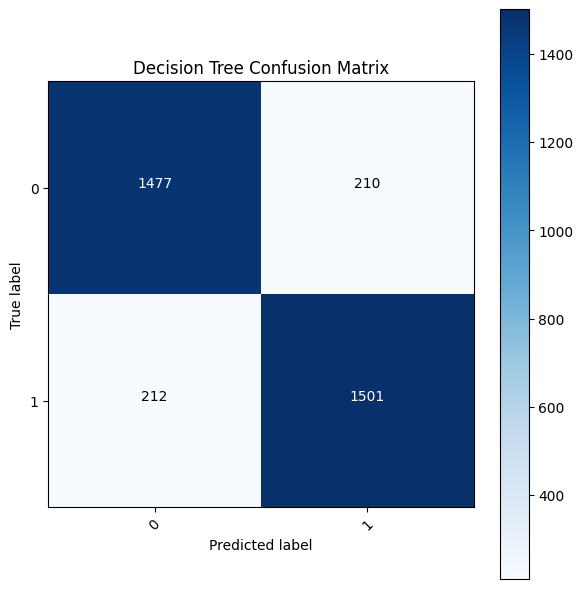

In [31]:
# Plotting the confusion matrix for Decision Tree
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0, 1], title='Decision Tree Confusion Matrix')

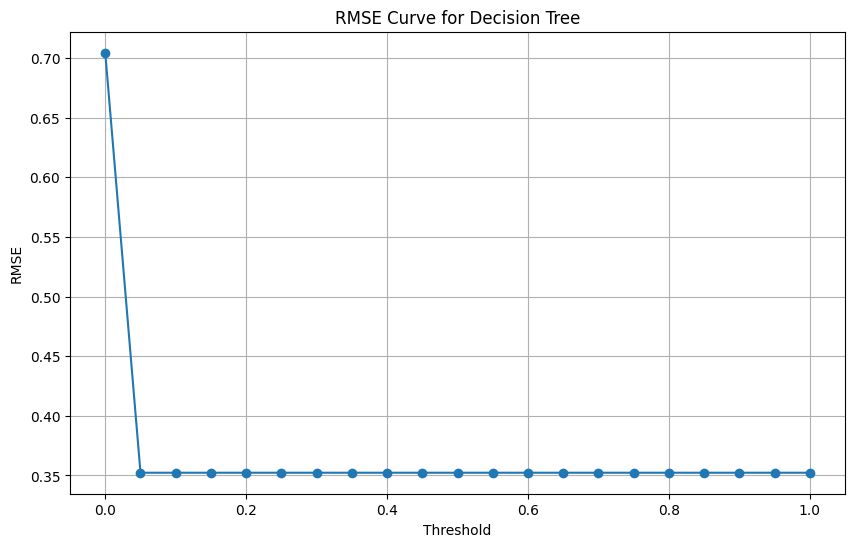

In [32]:
# Predict probabilities
y_prob = decision_tree_model.predict_proba(X_test)[:, 1]

# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
rmse_values = []

# Calculate RMSE for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_threshold))
    rmse_values.append(rmse)

# Plot RMSE curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rmse_values, marker='o')
plt.title('RMSE Curve for Decision Tree')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
random_forest_model = RandomForestClassifier()

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
rf_report = classification_report(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("Random Forest Model")
print("Accuracy:", accuracy)
print("Classification Report:\n", rf_report)
print("RMSE:", rmse)

Random Forest Model
Accuracy: 0.9005882352941177
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1687
           1       0.90      0.91      0.90      1713

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400

RMSE: 0.31529631254723284


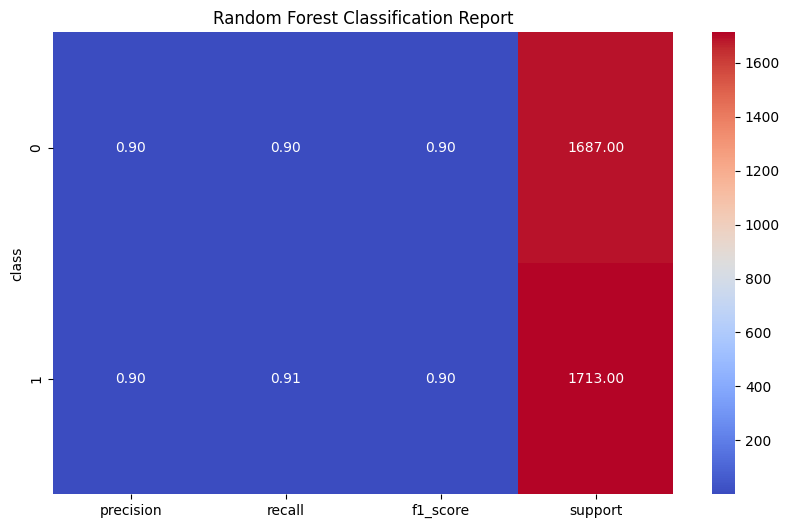

In [34]:
plot_classification_report(rf_report, 'Random Forest Classification Report')

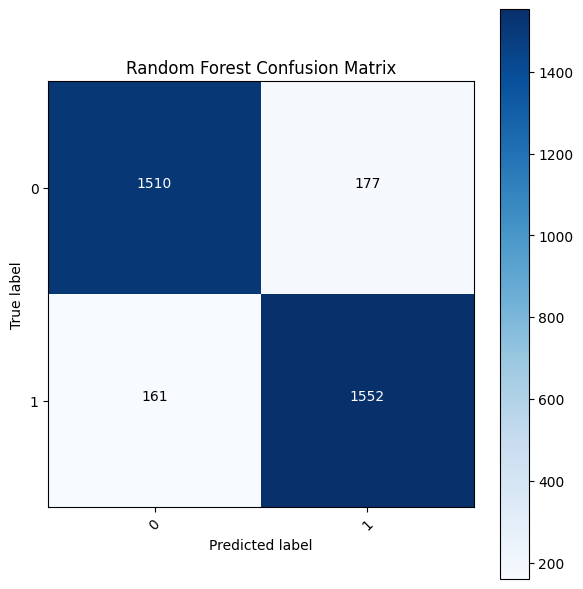

In [35]:
# Plotting the confusion matrix for Random Forest
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0, 1], title='Random Forest Confusion Matrix')

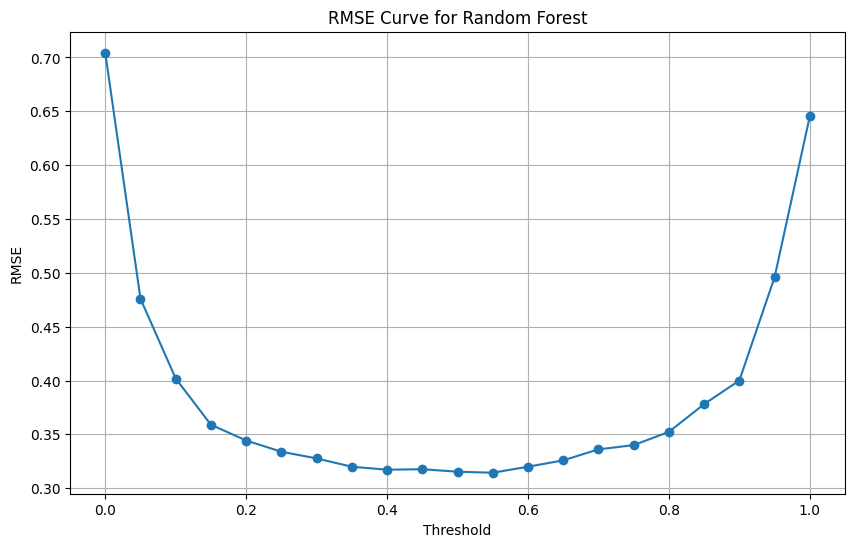

In [36]:
# Predict probabilities
y_prob = random_forest_model.predict_proba(X_test)[:, 1]

# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
rmse_values = []

# Calculate RMSE for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_threshold))
    rmse_values.append(rmse)

# Plot RMSE curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rmse_values, marker='o')
plt.title('RMSE Curve for Random Forest')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

SVM

In [37]:
from sklearn.svm import SVC

# Initialize the model with probability enabled
svm_model = SVC(probability=True)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
svm_report = classification_report(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("Support Vector Machine (SVM) Model")
print("Accuracy:", accuracy)
print("Classification Report:\n", svm_report)
print("RMSE:", rmse)

Support Vector Machine (SVM) Model
Accuracy: 0.8894117647058823
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      1687
           1       0.89      0.90      0.89      1713

    accuracy                           0.89      3400
   macro avg       0.89      0.89      0.89      3400
weighted avg       0.89      0.89      0.89      3400

RMSE: 0.33254809470829577


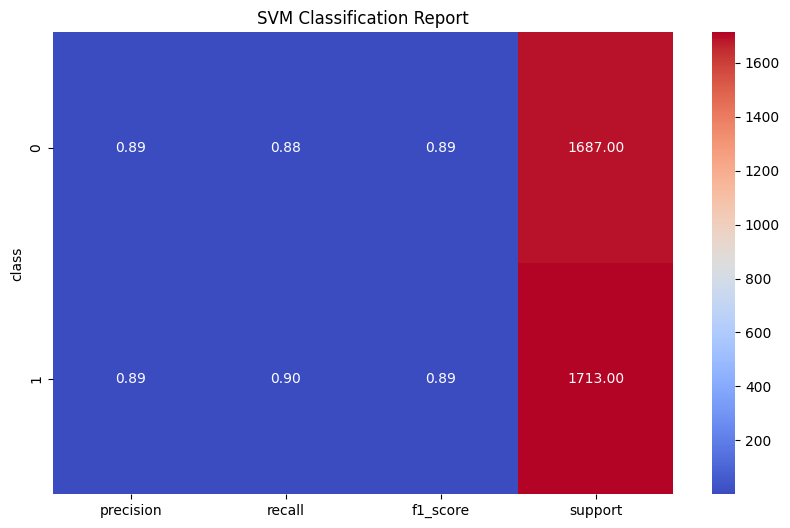

In [38]:
plot_classification_report(svm_report, 'SVM Classification Report')

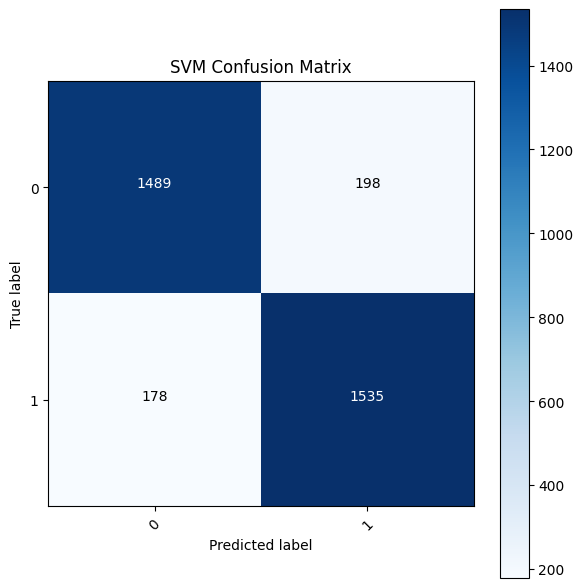

In [39]:
# Plotting the confusion matrix for SVM
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0, 1], title='SVM Confusion Matrix')

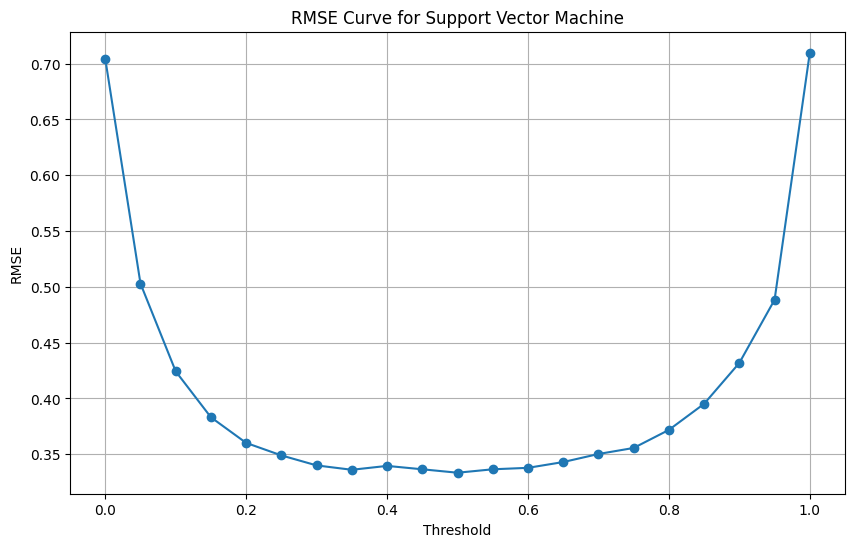

In [40]:
# Predict probabilities
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
rmse_values = []

# Calculate RMSE for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_threshold))
    rmse_values.append(rmse)

# Plot RMSE curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rmse_values, marker='o')
plt.title('RMSE Curve for Support Vector Machine')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
knn_report = classification_report(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("K-Nearest Neighbors (KNN) Model")
print("Accuracy:", accuracy)
print("Classification Report:\n", knn_report)
print("RMSE:", rmse)

K-Nearest Neighbors (KNN) Model
Accuracy: 0.8797058823529412
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      1687
           1       0.88      0.89      0.88      1713

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400

RMSE: 0.34683442396489256


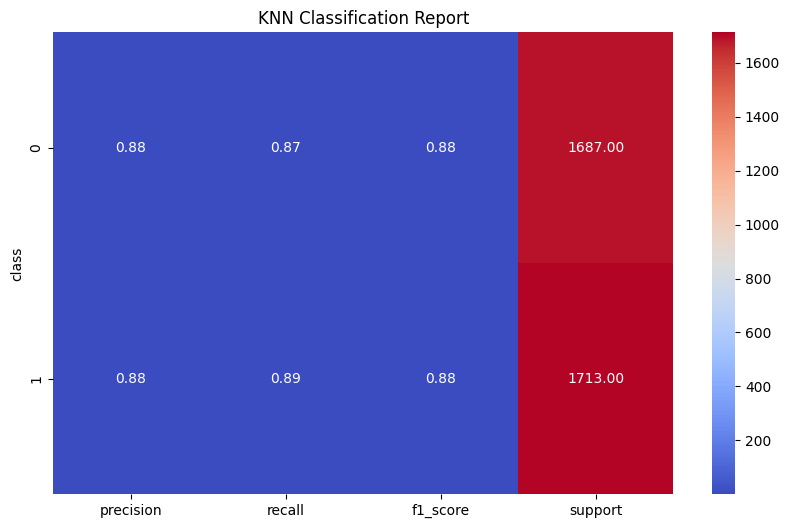

In [42]:
plot_classification_report(knn_report, 'KNN Classification Report')

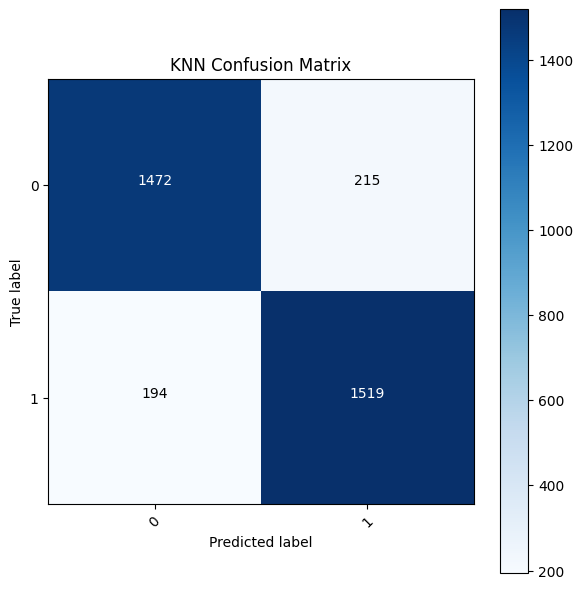

In [43]:
# Plotting the confusion matrix for KNN
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0, 1], title='KNN Confusion Matrix')

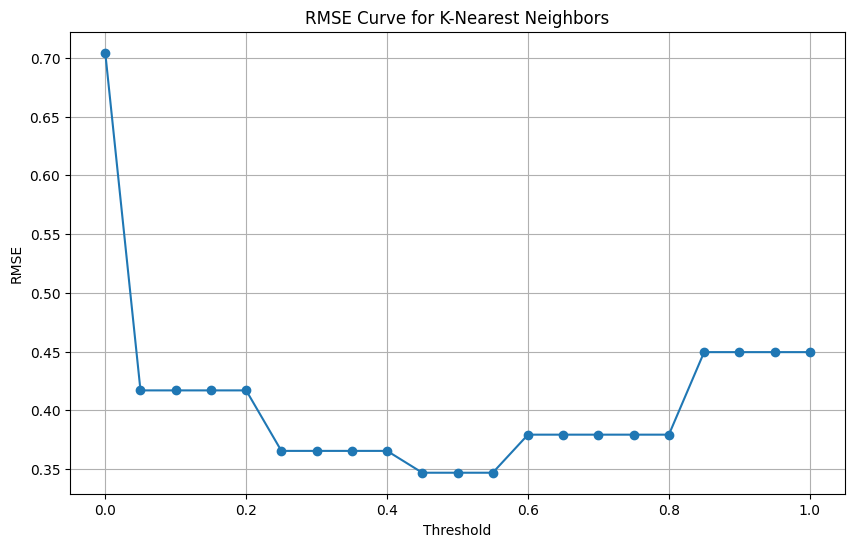

In [44]:
# Predict probabilities
y_prob = knn_model.predict_proba(X_test)[:, 1]

# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
rmse_values = []

# Calculate RMSE for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_threshold))
    rmse_values.append(rmse)

# Plot RMSE curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rmse_values, marker='o')
plt.title('RMSE Curve for K-Nearest Neighbors')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

Gradient Boosting classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gradient_boosting_model = GradientBoostingClassifier()

# Train the model
gradient_boosting_model.fit(X_train, y_train)

# Make predictions
y_pred = gradient_boosting_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
gb_report = classification_report(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("Gradient Boosting Classifier Model")
print("Accuracy:", accuracy)
print("Classification Report:\n", gb_report)
print("RMSE:", rmse)

Gradient Boosting Classifier Model
Accuracy: 0.9088235294117647
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1687
           1       0.90      0.92      0.91      1713

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400

RMSE: 0.30195441806377876


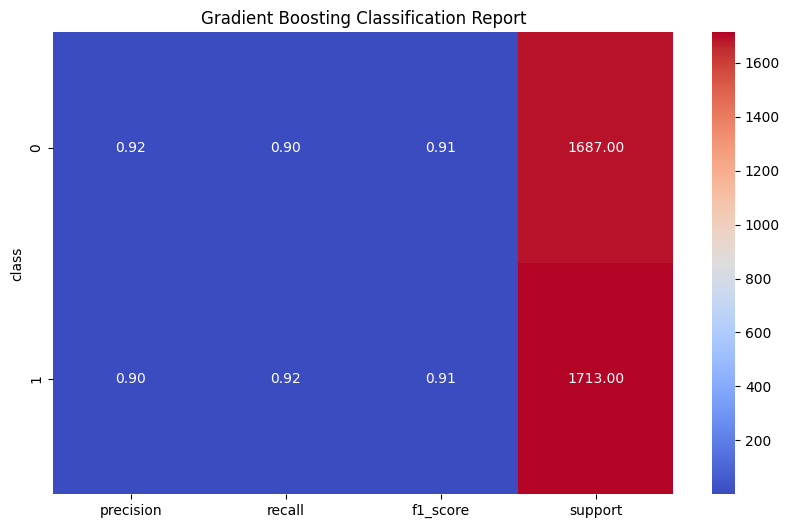

In [46]:
plot_classification_report(gb_report, 'Gradient Boosting Classification Report')

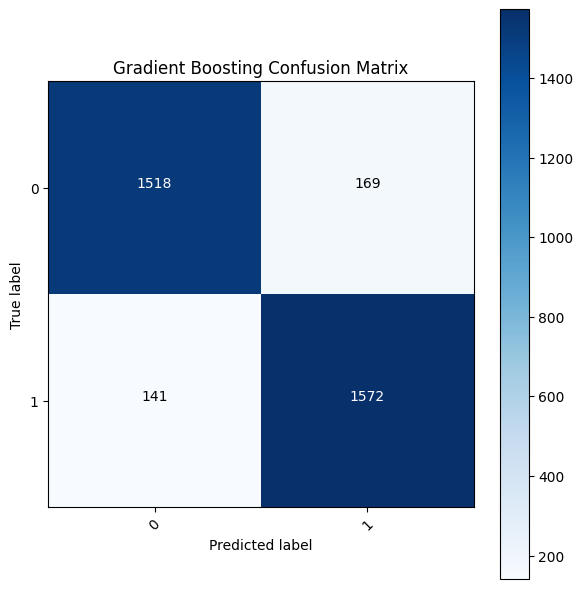

In [47]:
# Plotting the confusion matrix for Gradient Boosting
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0, 1], title='Gradient Boosting Confusion Matrix')

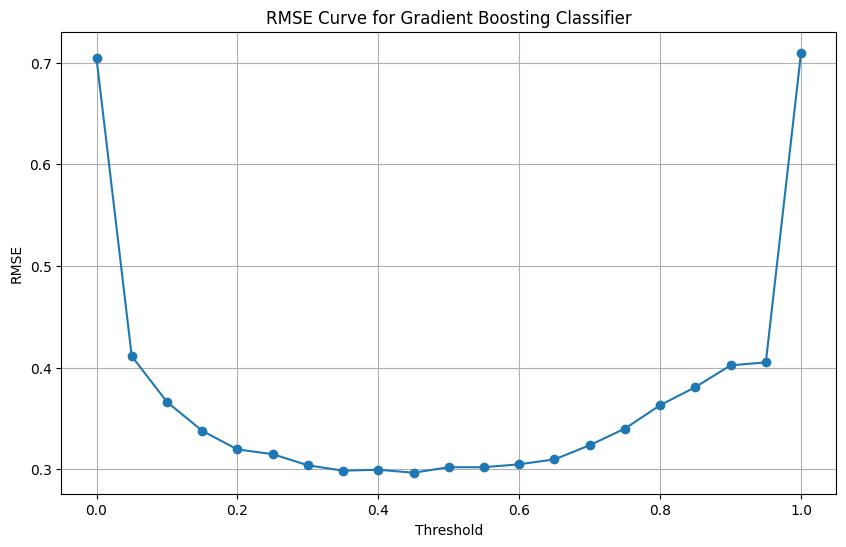

In [48]:
# Predict probabilities
y_prob = gradient_boosting_model.predict_proba(X_test)[:, 1]

# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
rmse_values = []

# Calculate RMSE for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_threshold))
    rmse_values.append(rmse)

# Plot RMSE curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rmse_values, marker='o')
plt.title('RMSE Curve for Gradient Boosting Classifier')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

Artificial Neural Networks (ANN)

In [49]:
!pip install numpy pandas scikit-learn keras tensorflow matplotlib

In [50]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score

# Ensure reproducibility
np.random.seed(42)

# Define the ANN model
ann_model = Sequential()
ann_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dense(units=16, activation='relu'))
ann_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred = (ann_model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
ann_report = classification_report(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("Artificial Neural Network (ANN) Model")
print("Accuracy:", accuracy)
print("Classification Report:\n", ann_report)
print("RMSE:", rmse)

Epoch 1/50
340/340 [==============================] - 6s 11ms/step - loss: 0.3100 - accuracy: 0.8667 - val_loss: 0.2628 - val_accuracy: 0.8842
Epoch 2/50
340/340 [==============================] - 3s 9ms/step - loss: 0.2524 - accuracy: 0.8824 - val_loss: 0.2637 - val_accuracy: 0.8750
Epoch 3/50
340/340 [==============================] - 4s 11ms/step - loss: 0.2484 - accuracy: 0.8857 - val_loss: 0.2578 - val_accuracy: 0.8805
Epoch 4/50
340/340 [==============================] - 2s 6ms/step - loss: 0.2424 - accuracy: 0.8886 - val_loss: 0.2557 - val_accuracy: 0.8842
Epoch 5/50
340/340 [==============================] - 3s 8ms/step - loss: 0.2398 - accuracy: 0.8927 - val_loss: 0.2513 - val_accuracy: 0.8864
Epoch 6/50
340/340 [==============================] - 2s 7ms/step - loss: 0.2349 - accuracy: 0.8927 - val_loss: 0.2448 - val_accuracy: 0.8912
Epoch 7/50
340/340 [==============================] - 2s 6ms/step - loss: 0.2280 - accuracy: 0.8953 - val_loss: 0.2412 - val_accuracy: 0.8901
Epoc

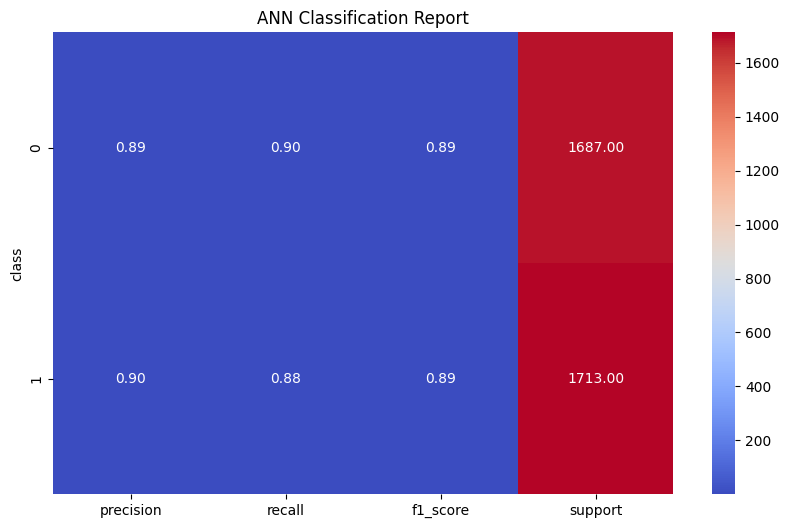

In [51]:
plot_classification_report(ann_report, 'ANN Classification Report')

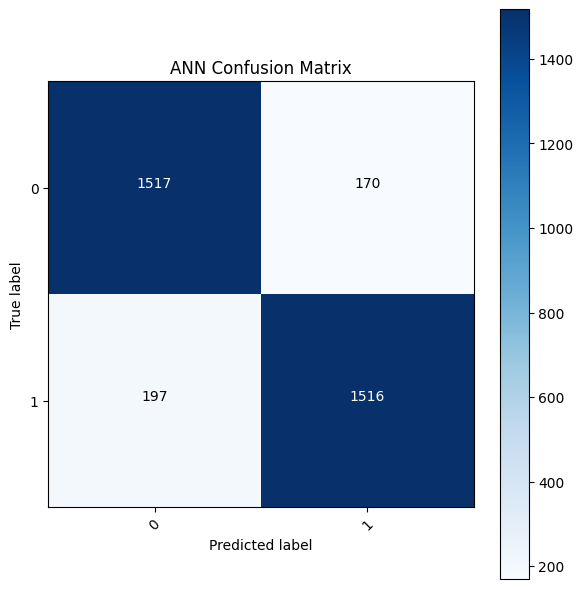

In [52]:
# Plotting the confusion matrix for ANN
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0, 1], title='ANN Confusion Matrix')

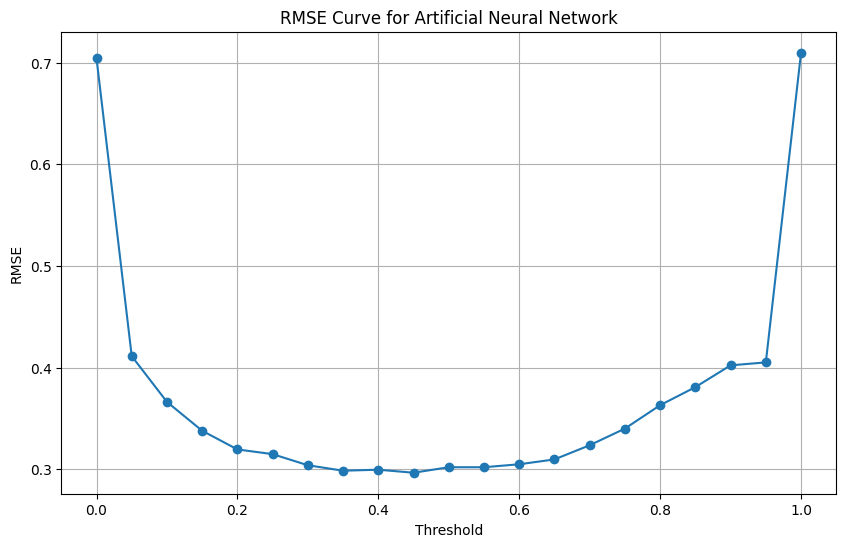

In [53]:
# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
rmse_values = []

# Calculate RMSE for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_threshold))
    rmse_values.append(rmse)

# Plot RMSE curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rmse_values, marker='o')
plt.title('RMSE Curve for Artificial Neural Network')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

Convolutional Neural Networks (CNN)

In [54]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.metrics import classification_report, accuracy_score

# Ensure reproducibility
np.random.seed(42)

# Reshape data to fit into the CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cnn_report = classification_report(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print("Convolutional Neural Network (CNN) Model")
print("Accuracy:", accuracy)
print("Classification Report:\n", cnn_report)
print("RMSE:", rmse)

Epoch 1/50
340/340 [==============================] - 3s 5ms/step - loss: 0.2798 - accuracy: 0.8732 - val_loss: 0.2617 - val_accuracy: 0.8813
Epoch 2/50
340/340 [==============================] - 2s 5ms/step - loss: 0.2372 - accuracy: 0.8873 - val_loss: 0.2325 - val_accuracy: 0.8908
Epoch 3/50
340/340 [==============================] - 2s 5ms/step - loss: 0.2226 - accuracy: 0.8936 - val_loss: 0.2278 - val_accuracy: 0.8846
Epoch 4/50
340/340 [==============================] - 1s 4ms/step - loss: 0.2147 - accuracy: 0.8975 - val_loss: 0.2249 - val_accuracy: 0.8960
Epoch 5/50
340/340 [==============================] - 2s 5ms/step - loss: 0.2135 - accuracy: 0.8983 - val_loss: 0.2193 - val_accuracy: 0.8886
Epoch 6/50
340/340 [==============================] - 2s 7ms/step - loss: 0.2071 - accuracy: 0.9028 - val_loss: 0.2173 - val_accuracy: 0.8904
Epoch 7/50
340/340 [==============================] - 2s 7ms/step - loss: 0.2063 - accuracy: 0.9007 - val_loss: 0.2186 - val_accuracy: 0.8938
Epoch 

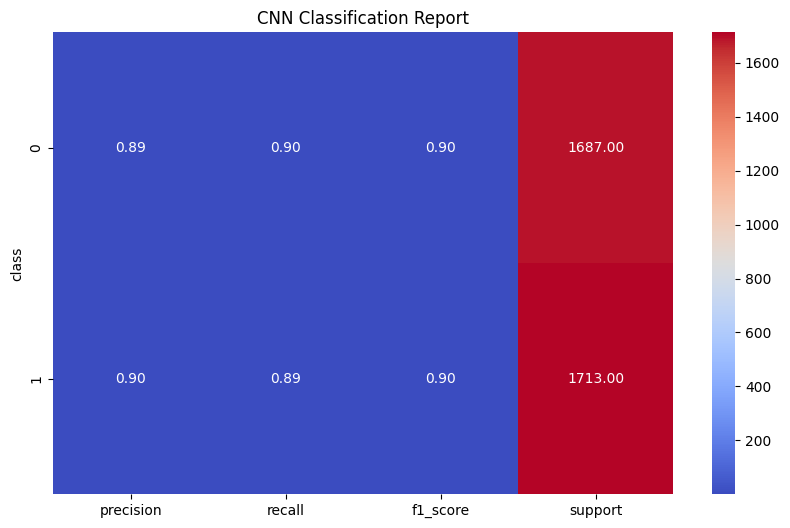

In [55]:
plot_classification_report(cnn_report, 'CNN Classification Report')

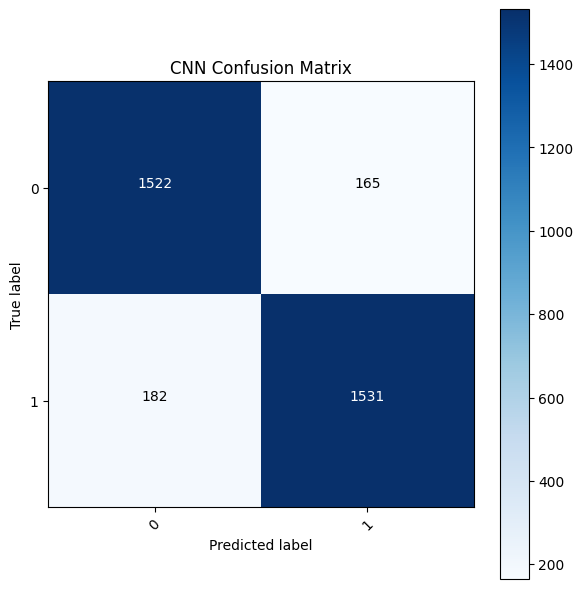

In [56]:
# Plotting the confusion matrix for CNN
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=[0, 1], title='CNN Confusion Matrix')

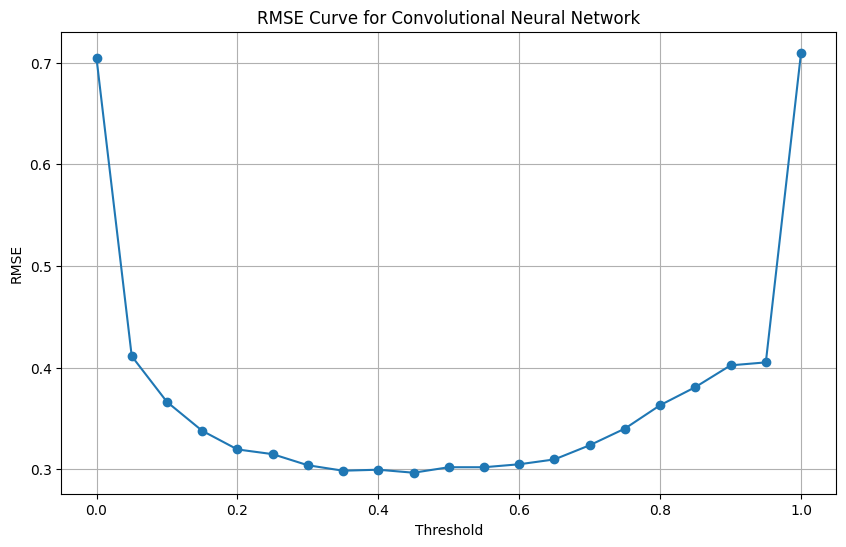

In [57]:
# Define thresholds
thresholds = np.arange(0.0, 1.05, 0.05)
rmse_values = []

# Calculate RMSE for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_threshold))
    rmse_values.append(rmse)

# Plot RMSE curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, rmse_values, marker='o')
plt.title('RMSE Curve for Convolutional Neural Network')
plt.xlabel('Threshold')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

Gradient Boosting Hyperparameter Tuning with RandomizedSearchCV

In [58]:
import warnings
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Suppress warnings for clean output
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Define the model
gb = GradientBoostingClassifier()

# Define the parameters to search
gb_params = {
    'n_estimators': [50, 100, 200, 400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use the loky backend for parallel processing
with joblib.parallel_backend('loky'):
    # Initialize RandomizedSearchCV
    gb_random = RandomizedSearchCV(gb, gb_params, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

    # Fit RandomizedSearchCV
    gb_random.fit(X_train, y_train)

# Best parameters and score
best_gb = gb_random.best_estimator_
gb_best_params = gb_random.best_params_
gb_best_score = gb_random.best_score_

# Evaluate on test data
y_pred = best_gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred)
gb_report = classification_report(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best Gradient Boosting Model")
print("Best Parameters:", gb_best_params)
print("Best Cross-Validation Score:", gb_best_score)
print("Test Accuracy:", gb_accuracy)
print("Classification Report:\n", gb_report)
print("RMSE:", rmse)

Best Gradient Boosting Model
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.1}
Best Cross-Validation Score: 0.9148529411764705
Test Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1687
           1       0.90      0.92      0.91      1713

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400

RMSE: 0.3


**Results**

The overall accuracy of the model achieved by each classifier—Logistic Regression, Decision Tree, Random ForestClassifier, SVM, K-Nearest Neighbors, Gradient Boosting classifier, ANN, CNN —is as follows: 89.02%, 87.58%, 90.05%, 88.94%, 87.97%, 90.88%, 89.20%, 89.79% respectively. Among the four classifiers, the Gradient Boosting classifier is achieved the highest overall accuracy of 90.88%

The RMSE value of the model achieved by each classifier—Logistic Regression, Decision Tree, Random ForestClassifier, SVM, K-Nearest Neighbors, Gradient Boosting classifier, ANN, CNN —is as follows: 0.3312, 0.3523, 0.3152, 0.3325, 0.3469, 0.3019, 0.3285, 0.3194 respectively. Among the four classifiers, the Gradient Boosting classifier is achieved the less RMSE value of 0.3019

Based on above results, the best model is Gradient Boosting having highest accuracy of 90.88% and less RMSE value of 0.3019

After doing the hyperparameter tuning to our best model Gradient Boosting, it achieves accuracy of 91% and RMSE value of 0.3